In [64]:
import pandas as pd
import numpy as np

<h1>Ретроспектива прошлых результатов</h1>
<h3>Разделение всех статических анализаторов на группы</h3>

- Группа А - анализаторы входящие в агрегаторы
- Группа Б - агрегаторы
- Группа В - анализаторы не входящие в агрегаторы

<img src="myplot.jpg">

## Исследование будет производиться над одним анализатором группы Б (golangcilint) и анализаторами группы В

In [5]:
from supervenn import supervenn
import matplotlib.pyplot as plt

In [37]:
sets = []
labels = []
with open("dataset.dat", "r") as myfile:
    while True:
        line = myfile.readline()
        if not line:
            break
        labels += [line.split()[0]]
        sets += [set(line.split()[1:])]

In [38]:
cilint = sets[154]
labels2 = []
sets2 = []

In [39]:
for i in range(len(sets)):
    if len(sets[i] & cilint) == 0:
        sets2 += [sets[i]]
        labels2 += [labels[i]]

labels2 += ["golangcilint"]
sets2 += [cilint]

## Исследуемые анализаторы

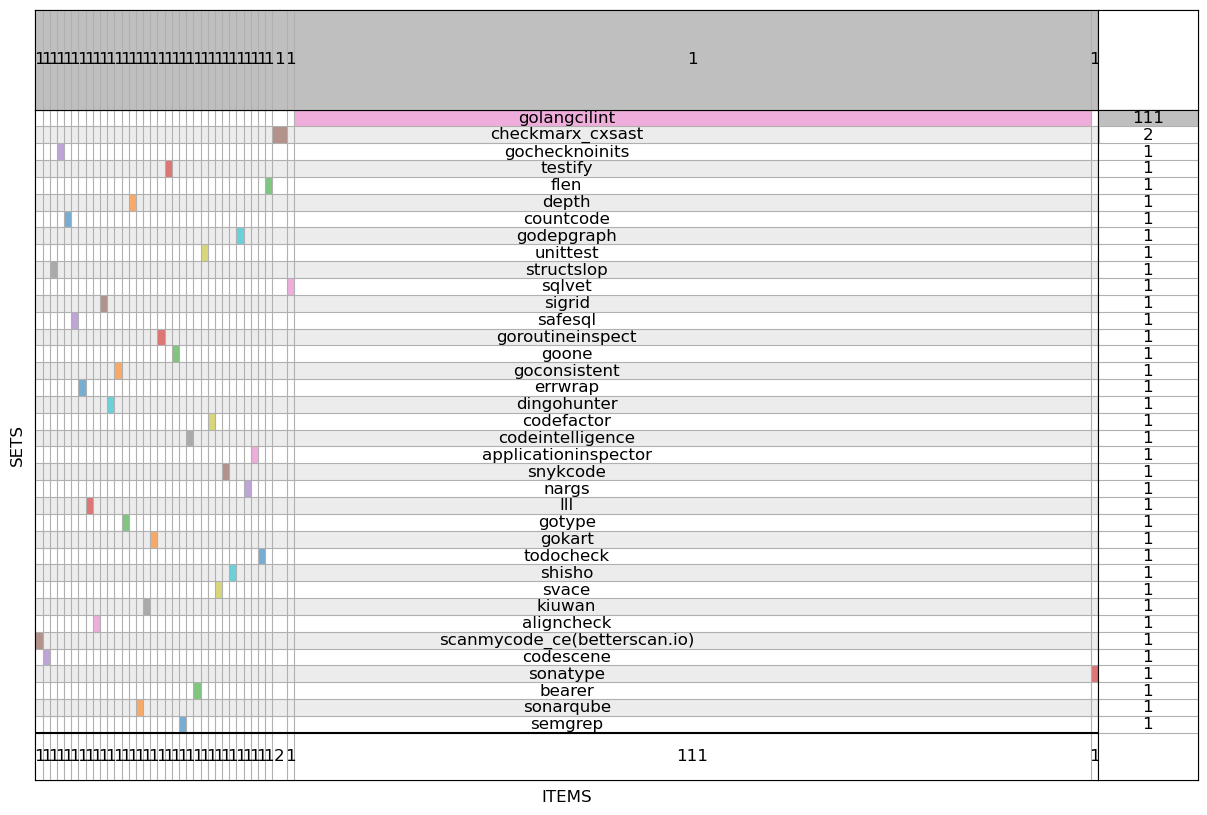

In [59]:
plt.figure(figsize=(15, 10))
supervenn(sets2, labels2)
plt.plot()
None

## Что было сделано к данному моменту
- <h4>Придумано "удобное" представление выходных данных golangcilint</h4>
- <h4>Написан "лексический анализатор" для выходных данных golangcilint</h4>
- <h4>Написан преобразователь в csv</h4>

## Для чего нужно преобразовывать данные

In [62]:
!head -20 cilint_out.txt

pkg/highlight/highlighter.go:54:6: `combineLineMatch` is unused (deadcode)
func combineLineMatch(src, dst LineMatch) LineMatch {
     ^
internal/buffer/buffer.go:33:7: `backupTime` is unused (deadcode)
const backupTime = 8000
      ^
internal/action/infocomplete.go:80:6: `contains` is unused (deadcode)
func contains(s []string, e string) bool {
     ^
cmd/micro/micro.go:35:2: `autosave` is unused (deadcode)
	autosave chan bool
	^
internal/screen/screen.go:90:2: declaration has 3 blank identifiers (dogsled)
	r, _, _, _ := Screen.GetContent(x, y)
	^
internal/lua/lua.go:149: 149-215 lines are duplicate of `internal/lua/lua.go:217-283` (dupl)
func importNet() *lua.LTable {
	pkg := L.NewTable()

	L.SetField(pkg, "CIDRMask", luar.New(L, net.CIDRMask))


## Требуется "вытащить" все полезные данные из вывода и организовать в формат csv
### Для этого на c++ написаны анализатор и преобразователь 

In [108]:
string1 = ""
with open("code.txt", "r") as myfile:
    string1 = myfile.read()

list1 = string1.split("$$$")
code = pd.Series(list1[1:])

In [109]:
data = pd.read_csv("meta.csv", sep=";;", engine='python')

In [110]:
data["code"] = code

In [111]:
data

,file,row,col,error,analyzer,code
0,pkg/highlight/highlighter.go,54,6,`combineLineMatch` is unused,(deadcode),"\nfunc combineLineMatch(src, dst LineMatch) Li..."
1,internal/buffer/buffer.go,33,7,`backupTime` is unused,(deadcode),\nconst backupTime = 8000\n ^\n
2,internal/action/infocomplete.go,80,6,`contains` is unused,(deadcode),"\nfunc contains(s []string, e string) bool {\n..."
3,cmd/micro/micro.go,35,2,`autosave` is unused,(deadcode),\n\tautosave chan bool\n\t^\n
4,internal/screen/screen.go,90,2,declaration has 3 blank identifiers,(dogsled),"\n\tr, _, _, _ := Screen.GetContent(x, y)\n\t^\n"
...,...,...,...,...,...,...
846,internal/buffer/save.go,84,11,error returned from external package is unwrap...,(wrapcheck),\n\t\t\treturn err\n\t\t\t ^\n
847,internal/buffer/save.go,157,13,error returned from external package is unwrap...,(wrapcheck),\n\t\t\t\t\treturn mkdirallErr\n\t\t\t\t\t ...
848,internal/buffer/save.go,169,10,error returned from external package is unwrap...,(wrapcheck),\n\t\treturn err\n\t\t ^\n
849,internal/buffer/settings.go,94,10,error returned from external package is unwrap...,(wrapcheck),\n\t\treturn err\n\t\t ^\n


In [122]:
data["file"].value_counts()

file
internal/buffer/buffer.go          62
pkg/highlight/highlighter.go       45
internal/action/command.go         44
internal/action/actions.go         41
internal/action/bufpane.go         37
                                   ..
internal/config/autosave.go         1
internal/buffer/stack.go            1
internal/buffer/autocomplete.go     1
cmd/micro/debug.go                  1
internal/config/globals.go          1
Name: count, Length: 77, dtype: int64

### Посмотрим на гистограмму срабатываний для файла internal/buffer/buffer.go

In [126]:
row_count = 1273
string2 = "internal/buffer/buffer.go"

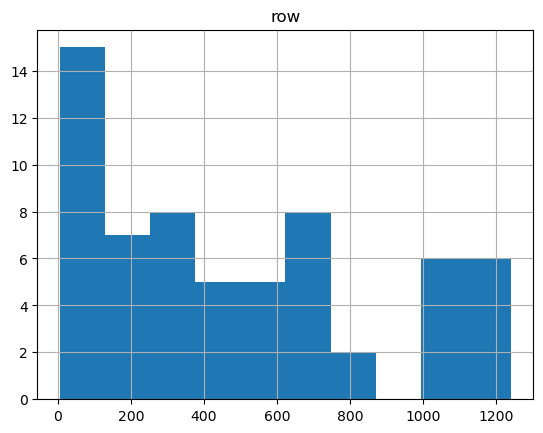

In [129]:
data[data["file"] == string2].hist("row")
None

## Что еще предстоит сделать
1) <h3>Просмотреть и отсеять остальные анализаторы, из выбранного списка, на предмет работоспособности и возможности использования</h3>
2) <h3>Написать преобразователи вывода для данных анализаторов</h3>
3) <h3>Попробовать локализовать разметку срабатываний</h3>
4) <h3>Разметить данные</h3>
5) <h3>Разработать дизайн исследования, выбрать метрики (небходима достоверная экстраполяция)</h3>
6) <h3>Провести исследование и в результате получить математически обоснованный вывод на основне метрик</h3>